## Exercício 1


![alt text](<exeercici 1.png>)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Constantes físicas
g = 9.8      # aceleração da gravidade (m/s^2)
k = 0.1      # coeficiente de resistência do ar (1/s)

# Condições iniciais
v0 = 0       # velocidade inicial (m/s)
x0 = 0       # posição inicial (m)
t_max = 10   # tempo total (s)
dt = 0.001   # passo de tempo (s)

#### Parte 2 — Método de Euler Simples (sem listas)


In [4]:
def euler_simples(dt, t_max):
    """Euler explícito simples, sem estruturas de dados extras."""
    t = 0
    v = v0
    x = x0
    N = int(t_max / dt)
    
    # Simulação (sem armazenar resultados)
    for _ in range(N):
        a = g - k * v
        v += a * dt
        x += v * dt
        t += dt
    
    return x, v  # Retorna apenas o último valor

####  Parte 3 — Euler com listas e append()

In [5]:
def euler_append(dt, t_max):
    """Euler com listas e uso de append (mais lento)."""
    N = int(t_max / dt)
    t = 0

    t_list = []
    x_list = []
    v_list = []

    v = v0
    x = x0

    for _ in range(N):
        a = g - k * v
        v += a * dt
        x += v * dt
        t += dt

        # Armazenando tudo
        t_list.append(t)
        x_list.append(x)
        v_list.append(v)
    
    return t_list, x_list, v_list

#### Parte 4 — Euler com pré-alocação (numpy)

In [6]:
def euler_numpy(dt, t_max):
    """Euler com arrays numpy (mais rápido)."""
    N = int(t_max / dt)
    t_array = np.zeros(N)
    x_array = np.zeros(N)
    v_array = np.zeros(N)

    x = x0
    v = v0

    for i in range(1, N):
        a = g - k * v
        v += a * dt
        x += v * dt

        t_array[i] = i * dt
        x_array[i] = x
        v_array[i] = v

    return t_array, x_array, v_array


#### ⏱️ Parte 5 — Comparação de Desempenho

In [10]:
def medir_tempo(func, dt, t_max):
    """Mede o tempo de execução de uma função."""
    inicio = time.time()
    func(dt, t_max)
    fim = time.time()
    return fim - inicio

# Testar com diferentes N
Ns = [10**3, 10**4, 10**5, 10**6]
tempos = {
    "Euler Simples": [],
    "Euler Append": [],
    "Euler Numpy": []
}

for N in Ns:
    tmax = N * dt
    tempos["Euler Simples"].append(medir_tempo(euler_simples, dt, tmax))
    tempos["Euler Append"].append(medir_tempo(euler_append, dt, tmax))
    tempos["Euler Numpy"].append(medir_tempo(euler_numpy, dt, tmax))

####  Parte 6 — Gráfico Comparativo (log-log)

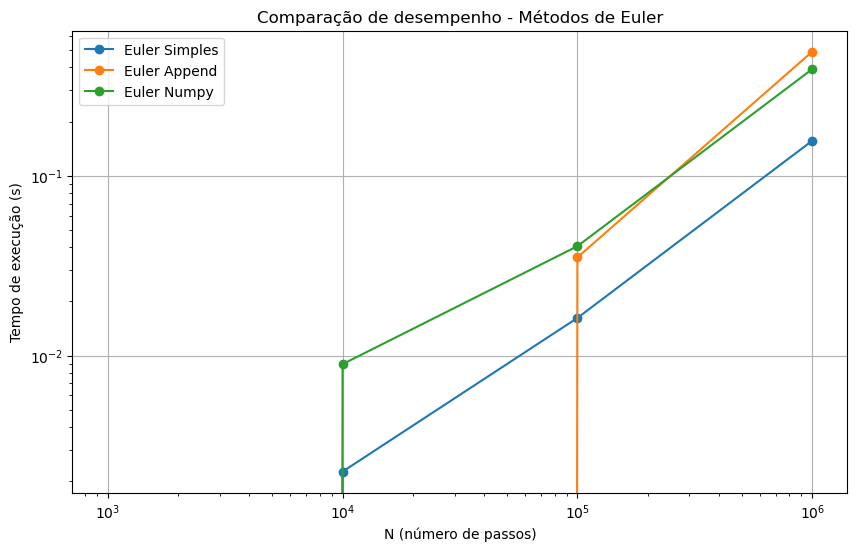

In [11]:
plt.figure(figsize=(10,6))

for metodo, t_exec in tempos.items():
    plt.plot(Ns, t_exec, label=metodo, marker='o')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (número de passos)')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparação de desempenho - Métodos de Euler')
plt.legend()
plt.grid(True)
plt.show()

#### Parte 7 — Runge-Kutta de 4ª Ordem (para comparação de precisão)



In [12]:
def runge_kutta_4(dt, t_max):
    """Método de Runge-Kutta 4ª ordem para o mesmo problema."""
    N = int(t_max / dt)
    t_array = np.zeros(N)
    x_array = np.zeros(N)
    v_array = np.zeros(N)

    x = x0
    v = v0

    for i in range(1, N):
        t = i * dt

        def a(v): return g - k * v

        # Runge-Kutta para v
        k1v = a(v)
        k1x = v

        k2v = a(v + 0.5 * dt * k1v)
        k2x = v + 0.5 * dt * k1v

        k3v = a(v + 0.5 * dt * k2v)
        k3x = v + 0.5 * dt * k2v

        k4v = a(v + dt * k3v)
        k4x = v + dt * k3v

        v += dt / 6 * (k1v + 2*k2v + 2*k3v + k4v)
        x += dt / 6 * (k1x + 2*k2x + 2*k3x + k4x)

        t_array[i] = t
        x_array[i] = x
        v_array[i] = v

    return t_array, x_array, v_array


#### gráfico comparando as trajetórias 𝑥(𝑡) x(t) dos métodos Euler e Runge-Kutta para ver a diferença na precisão.


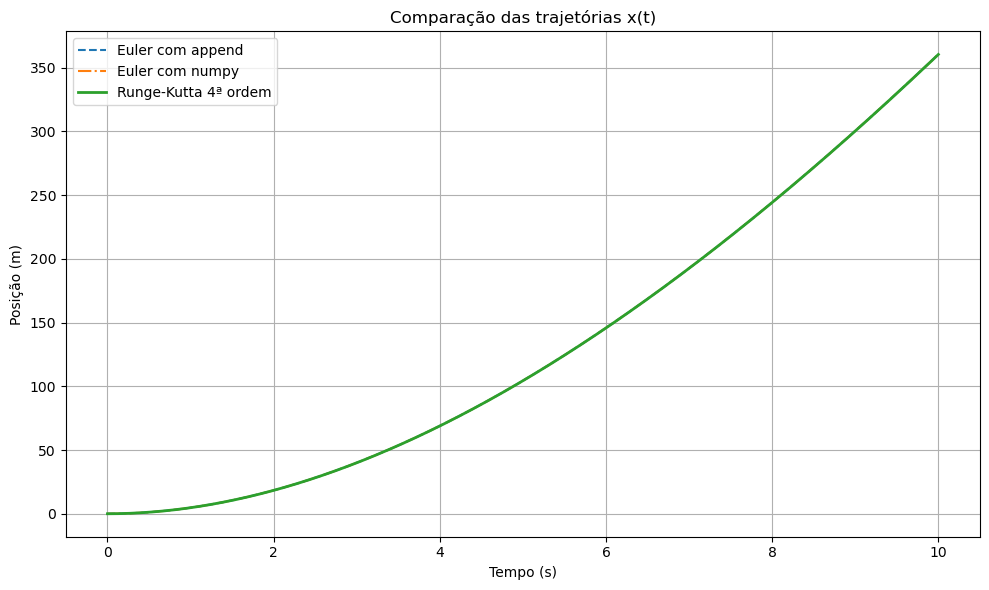

In [14]:
# Gerar os dados com t_max fixo para todos os métodos
t_max = 10  # tempo total em segundos
dt = 0.001  # passo de tempo

# Usar as versões que armazenam os dados
t_append, x_append, _ = euler_append(dt, t_max)
t_numpy, x_numpy, _ = euler_numpy(dt, t_max)
t_rk4, x_rk4, _ = runge_kutta_4(dt, t_max)

plt.figure(figsize=(10, 6))
plt.plot(t_append, x_append, label="Euler com append", linestyle='--')
plt.plot(t_numpy, x_numpy, label="Euler com numpy", linestyle='-.')
plt.plot(t_rk4, x_rk4, label="Runge-Kutta 4ª ordem", linewidth=2)

plt.xlabel("Tempo (s)")
plt.ylabel("Posição (m)")
plt.title("Comparação das trajetórias x(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
